In [1]:
using DataFrames
using CSV
ENV["COLUMNS"] = 1000
using CategoricalArrays


using Pipe: @pipe
using Setfield

## Initial steps

In [2]:
df = CSV.File("data/train.csv") |> DataFrame

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,Int64,Int64,Int64,String,String7,Float64?,Int64,Int64,String31,Float64,String15?,String1?
1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,missing,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,missing,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,missing,S
6,6,0,3,"Moran, Mr. James",male,missing,0,0,330877,8.4583,missing,Q
7,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.075,missing,S
9,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,missing,S


In [3]:
names(df) |> show
describe(df) 

["PassengerId", "Survived", "Pclass", "Name", "Sex", "Age", "SibSp", "Parch", "Ticket", "Fare", "Cabin", "Embarked"]

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,Type
1,PassengerId,446.0,1,446.0,891,0,Int64
2,Survived,0.383838,0,0.0,1,0,Int64
3,Pclass,2.30864,1,3.0,3,0,Int64
4,Name,,"Abbing, Mr. Anthony",,"van Melkebeke, Mr. Philemon",0,String
5,Sex,,female,,male,0,String7
6,Age,29.6991,0.42,28.0,80.0,177,"Union{Missing, Float64}"
7,SibSp,0.523008,0,0.0,8,0,Int64
8,Parch,0.381594,0,0.0,6,0,Int64
9,Ticket,,110152,,WE/P 5735,0,String31


In [4]:
df[1:5,[:Survived,:Name]]

,Survived,Name
,Int64,String
1,0,"Braund, Mr. Owen Harris"
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)"
3,1,"Heikkinen, Miss. Laina"
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
5,0,"Allen, Mr. William Henry"


In [5]:
# List of recorded sexes
levels(df[!,:Sex])

2-element Vector{String7}:
 "female"
 "male"

In [6]:
# Convert Survived column to boolean
df[!,:Survived] = convert.(Bool,df[!,:Survived])

# Convert Sex column to boolean
if columnindex(df,:Sex) != 0
    (df[!,:Sex] = df[!,:Sex] .== "male")
    rename!(df,:Sex => :Male)
end 
df.Embarked = categorical(df.Embarked)

first(df,5)

,PassengerId,Survived,Pclass,Name,Male,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,Int64,Bool,Int64,String,Bool,Float64?,Int64,Int64,String31,Float64,String15?,Cat…?
1,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.25,missing,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",0,38.0,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.925,missing,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1,C123,S
5,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.05,missing,S


In [7]:
first(df,5)

,PassengerId,Survived,Pclass,Name,Male,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,Int64,Bool,Int64,String,Bool,Float64?,Int64,Int64,String31,Float64,String15?,Cat…?
1,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.25,missing,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",0,38.0,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.925,missing,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1,C123,S
5,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.05,missing,S


### Missing value statistics

In [8]:
# Get missing stats
function show_missing(df)
    emptycols = count.(ismissing, eachcol(df))
    emptyperc = round.(emptycols ./ fill(size(df)...), digits = 3)
    sort(DataFrame(Column = names(df), Total = emptycols, Percent = emptyperc), :Total, rev = true)
end
show_missing(df)

,Column,Total,Percent
,String,Int64,Float64
1,Cabin,687,0.771
2,Age,177,0.199
3,Embarked,2,0.002
4,PassengerId,0,0.0
5,Survived,0,0.0
6,Pclass,0,0.0
7,Name,0,0.0
8,Male,0,0.0
9,SibSp,0,0.0


In [9]:
# TODO is it useful??
colwise(ismissing,df)
# count.(ismissing, eachcol(df))

LoadError: UndefVarError: colwise not defined

## Check cabins' information quality

In [10]:
cabin = @pipe dropmissing(df[:,[:Survived,:Cabin]]) |> sort(_,rev=true)
show(cabin, allrows=true)
cabin.Cabin = getindex.(cabin[:,:Cabin],1)

204×2 DataFrame
 Row │ Survived  Cabin           
     │ Bool      String15        
─────┼───────────────────────────
   1 │     true  G6
   2 │     true  G6
   3 │     true  F4
   4 │     true  F4
   5 │     true  F33
   6 │     true  F33
   7 │     true  F33
   8 │     true  F2
   9 │     true  F2
  10 │     true  F E69
  11 │     true  E8
  12 │     true  E8
  13 │     true  E68
  14 │     true  E67
  15 │     true  E50
  16 │     true  E49
  17 │     true  E44
  18 │     true  E40
  19 │     true  E36
  20 │     true  E34
  21 │     true  E33
  22 │     true  E33
  23 │     true  E25
  24 │     true  E25
  25 │     true  E24
  26 │     true  E24
  27 │     true  E17
  28 │     true  E121
  29 │     true  E121
  30 │     true  E12
  31 │     true  E101
  32 │     true  E101
  33 │     true  E101
  34 │     true  E10
  35 │     true  D9
  36 │     true  D7
  37 │     true  D56
  38 │     true  D49
  39 │     true  D47
  40 │     true  D45
  41 │     true  D37
  42 │     true  D36
  4

204-element Vector{Char}:
 'G': ASCII/Unicode U+0047 (category Lu: Letter, uppercase)
 'G': ASCII/Unicode U+0047 (category Lu: Letter, uppercase)
 'F': ASCII/Unicode U+0046 (category Lu: Letter, uppercase)
 'F': ASCII/Unicode U+0046 (category Lu: Letter, uppercase)
 'F': ASCII/Unicode U+0046 (category Lu: Letter, uppercase)
 'F': ASCII/Unicode U+0046 (category Lu: Letter, uppercase)
 'F': ASCII/Unicode U+0046 (category Lu: Letter, uppercase)
 'F': ASCII/Unicode U+0046 (category Lu: Letter, uppercase)
 'F': ASCII/Unicode U+0046 (category Lu: Letter, uppercase)
 'F': ASCII/Unicode U+0046 (category Lu: Letter, uppercase)
 'E': ASCII/Unicode U+0045 (category Lu: Letter, uppercase)
 'E': ASCII/Unicode U+0045 (category Lu: Letter, uppercase)
 'E': ASCII/Unicode U+0045 (category Lu: Letter, uppercase)
 ⋮
 'B': ASCII/Unicode U+0042 (category Lu: Letter, uppercase)
 'B': ASCII/Unicode U+0042 (category Lu: Letter, uppercase)
 'B': ASCII/Unicode U+0042 (category Lu: Letter, uppercase)
 'B': ASCII

In [11]:
@pipe groupby(cabin, :Cabin) |>
      combine(_,
          :Survived => sum => :Survived,
          :Survived => (s -> count(s .== false)) => :Died,
          nrow,
          :Survived => (s -> round(sum(s) / count(s .== false), digits = 2)) => :Ratio
      ) |> sort(_, :Ratio, rev = true)

,Cabin,Survived,Died,nrow,Ratio
,Char,Int64,Int64,Int64,Float64
1,D,25,8,33,3.12
2,E,24,8,32,3.0
3,B,35,12,47,2.92
4,F,8,5,13,1.6
5,C,35,24,59,1.46
6,G,2,2,4,1.0
7,A,7,8,15,0.88
8,T,0,1,1,0.0


### Preping data for first exploratory model

In [12]:
df.FamilySize = df.SibSp .+ df.Parch
family_df = df[:, Not([:SibSp,:Parch])]
first(family_df)

,PassengerId,Survived,Pclass,Name,Male,Age,Ticket,Fare,Cabin,Embarked,FamilySize
,Int64,Bool,Int64,String,Bool,Float64?,String31,Float64,String15?,Cat…?,Int64
1,1,0,3,"Braund, Mr. Owen Harris",1,22.0,A/5 21171,7.25,missing,S,1


In [91]:
sub_df = df[:, Not([:SibSp,:Parch,:Name,:Ticket,:Cabin,:PassengerId])]
if columnindex(df,:Age) != 0
    sub_df.Age = coalesce.(sub_df.Age, 99.5)
end 
first(sub_df,5) 


,Survived,Pclass,Male,Age,Fare,Embarked,FamilySize
,Bool,Int64,Bool,Float64,Float64,Cat…?,Int64
1,0,3,1,22.0,7.25,S,1
2,1,1,0,38.0,71.2833,C,1
3,1,3,0,26.0,7.925,S,0
4,1,1,0,35.0,53.1,S,1
5,0,3,1,35.0,8.05,S,0


In [110]:
dropmissing!(sub_df)
show_missing(sub_df)

,Column,Total,Percent
,String,Int64,Float64
1,Survived,0,0.0
2,Pclass,0,0.0
3,Male,0,0.0
4,Age,0,0.0
5,Fare,0,0.0
6,Embarked,0,0.0
7,FamilySize,0,0.0


### Rudimental Regression

In [34]:
using GLM
using StatsModels

In [64]:
using Lathe.preprocess: TrainTestSplit
train, test = TrainTestSplit(sub_df, .75);

In [65]:
# model = lm(@formula(Survived ~ Pclass + Male + Age + Fare + Embarked + FamilySize),sub_df)
# fit(LinearModel, @formula(Survived ~ Pclass + Male + Age + Fare + Embarked + FamilySize),sub_df)
logit = glm(@formula(Survived ~ Pclass + Male + Age + Fare + Embarked ), train, Binomial(), LogitLink())

StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Vector{Float64}, Binomial{Float64}, LogitLink}, GLM.DensePredChol{Float64, Cholesky{Float64, Matrix{Float64}}}}, Matrix{Float64}}

Survived ~ 1 + Pclass + Male + Age + Fare + Embarked

Coefficients:
────────────────────────────────────────────────────────────────────────────────
                    Coef.  Std. Error       z  Pr(>|z|)   Lower 95%    Upper 95%
────────────────────────────────────────────────────────────────────────────────
(Intercept)   4.18229      0.5308        7.88    <1e-14   3.14195     5.22264
Pclass       -0.948593     0.147109     -6.45    <1e-09  -1.23692    -0.660264
Male         -2.53035      0.212685    -11.90    <1e-31  -2.9472     -2.11349
Age          -0.0109766    0.00366206   -3.00    0.0027  -0.0181541  -0.00379908
Fare          0.000452993  0.00233208    0.19    0.8460  -0.0041178   0.00502379
Embarked: Q   0.408517     0.429413      0.95    0.3414  -0.433117    1.25015
Embarked: S  -0

In [66]:
predict(logit,test)

223-element Vector{Union{Missing, Float64}}:
 0.10346871774204507
 0.867824072822779
 0.09256337439464964
 0.6066453533232123
 0.6034495004831595
 0.7663714744994469
 0.04699462736878972
 0.10451469516059732
 0.504487937743508
 0.40702950573168656
 0.09286901249401301
 0.776313758741114
 0.10660269140124018
 ⋮
  missing
 0.04699462736878972
 0.10555182386561965
 0.10873374168832396
 0.12446592654600636
 0.061237155482882714
 0.7763691531764296
 0.047024053434343085
 0.09949236965722393
 0.40520135505905536
 0.9344216592620453
 0.09281704730030903

In [117]:
train, test = TrainTestSplit(sub_df, .75);
model = glm(@formula(Survived ~ Pclass + Male + Age + Fare + Embarked  ), train, Binomial(), LogitLink());

pred = predict(model,test);

In [118]:
a = DataFrame(Ref=test[:,:Survived],Pred= round.(pred))
all = nrow(a)
good = count(a.Ref .== a.Pred)
good/all

0.7746478873239436

In [3]:
first(df,5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,Int64,Int64,Int64,String,String7,Float64?,Int64,Int64,String31,Float64,String15?,String1?
1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,missing,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,missing,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,missing,S


In [123]:
using Plots
plot(test.Age, predict(model), seriestype = :model) 

LoadError: The backend must not support the series type Val{:model}, and there isn't a series recipe defined.

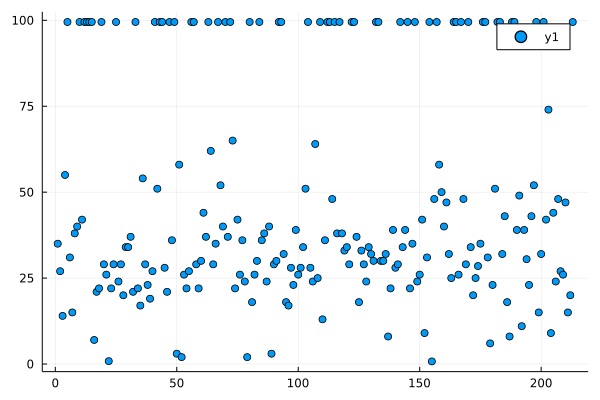

In [124]:
scatter(test.Age)